In [1]:
using Random, LinearAlgebra, StatsPlots, Statistics, LaTeXStrings

In [2]:
function buildCollection(N)
    return [0 for _ in 1:N]
end

function sample(N, collection)
    s = rand(1:N)
    collection[s] = collection[s] | 1
end

function count(N, collection)
    c = 0
    for i in 1:N
        c = c + collection[i]
    end
    return c
end

function comparar_suma(arr, c)
    res = 0
    for i in 1:size(arr)[1]
        res = res + (arr[i] < c)
    end
    return res
end

comparar_suma (generic function with 1 method)

In [14]:
# Collection sizes
Collections = [10, 30, 50, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
#Collections = Array([10, 30, 50, 70])

# Number of t0rials for each case
N = 200

# Save the results
R = Array{Float64}(undef, N, size(Collections)[1])
 
i = 1
for c in Collections
    print("Tamaño:", c)
    for n in 1:N
        collection = buildCollection(c)
        iter = 0
        while  count(c, collection) != c
            sample(c, collection)
            iter = iter + 1
        end
        R[n, i] = iter
    end
    i += 1
end
    

Tamaño:10Tamaño:30Tamaño:50Tamaño:100Tamaño:150Tamaño:200Tamaño:300Tamaño:400Tamaño:500Tamaño:600Tamaño:700Tamaño:800Tamaño:900Tamaño:1000

In [22]:
C = -6:6

P = Array{Float64}(undef, size(C)[1], size(Collections)[1] )
j = 1
for c in C
    i = 1
    for n in Collections
        #print(c, "--", n, "--", log(n) + c*n, "\n")
        ct = n * log(n) + c*n
        P[j, i] = comparar_suma(R[:, i], ct) / N
        i+=1
    end
    j += 1
end

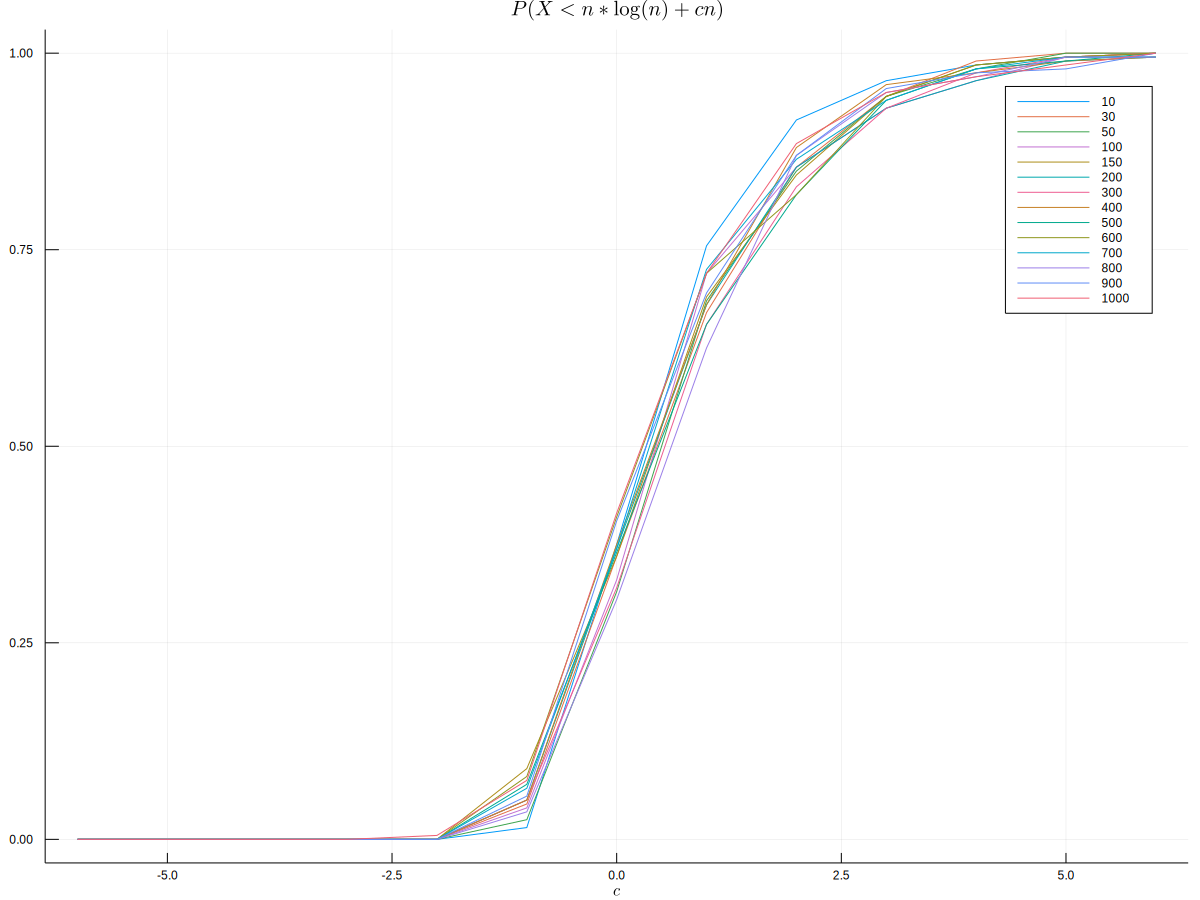

In [55]:
plot(C, P,
    title=L"P(X<n*\log(n)+cn)",
    label=permutedims([string(x) for x in Collections]),
    size=(1200, 900))
xlabel!(L"c")